In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "estadistica" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/estadistica'

In [ ]:
#@title **IMPORTAR LIBRERIAS**

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imageio.v3 as iio
import skimage as ski
import cv2
from pathlib import Path
sns.set_theme()
pd.__version__

'2.0.3'

#Grupo de Proyecto:

- Brayan Yesid Quintero Santander
- Sergio Nelson Alberto Gómez Gil
- Reinaldo Cardenas Tirado


##Video Game Sales


El conjunto de datos lo proporciona el usuario GregorySmith en la colección de conjuntos de datos públicos de Kaggle. El conjunto de datos se actualizó por última vez hace 8 años (2016) y contiene una lista de videojuegos con ventas superiores a 100.000 copias de vgchartz.com.

Los datos disponibles en esto no permiten un modelado de datos sofisticado, como modelos de clasificación/regresión para machine learning. En cambio, deberíamos poder realizar un análisis de datos exploratorio para tener una idea general detrás de qué empresas han publicado juegos con las mayores cifras de ventas.

En el análisis exploratorio a realizar para este conjunto de datos, identificaremos patrones y tendencias en las ventas de videojuegos ademas de ver qué empresas dominan el mercado. Nos enfocaremos en aspectos como las ventas por región, los géneros más populares y las plataformas más exitosas. Además, examinaremos cómo las cifras de ventas han evolucionado a lo largo del tiempo y qué títulos han destacado en términos de ventas. Este análisis no solo iluminará el desempeño de las empresas en el pasado, sino que también ofrecerá una visión más clara de las dinámicas del mercado de videojuegos, ayudándonos a entender qué factores han contribuido al éxito de las principales compañías de la industria.

La era de los videojuegos desde 1980 hasta 2016 ha sido testigo de una evolución significativa, marcada por la competencia feroz entre los gigantes de la industria: PlayStation, Nintendo y Xbox. Nintendo, pionera en la industria, dominó los años 80 y principios de los 90 con consolas icónicas como la NES y la SNES, así como con franquicias emblemáticas como Mario y Zelda. La entrada de Sony con la PlayStation en 1994 revolucionó el mercado, ofreciendo gráficos avanzados y una extensa biblioteca de juegos que atrajo a una nueva generación de jugadores. A principios de los 2000, Microsoft lanzó la Xbox, introduciendo innovaciones como Xbox Live, que popularizó el juego en línea. Cada empresa ha dejado su huella única en la industria, con Nintendo destacándose por su innovación en jugabilidad, Sony por su poderío gráfico y narrativa inmersiva, y Microsoft por su integración de servicios en línea y ecosistema de entretenimiento. La competencia entre estas tres compañías ha impulsado avances tecnológicos y ha definido el panorama de los videojuegos durante más de tres décadas.

Referencia:

Kent, S. L. (2001). The Ultimate History of Video Games: From Pong to Pokémon and Beyond - The Story Behind the Craze that Touched Our Lives and Changed the World. Three Rivers Press.

[link del kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales/data)

In [ ]:
#@title **dataset**

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


data_juegos = pd.read_csv("/content/drive/MyDrive/estadistica/vgsales.csv", delimiter = ',')
print(data_juegos.shape)
data_juegos['Year'] = pd.to_numeric(data_juegos['Year'], errors='coerce') #Pasar los datos de año a instancia numerica
data_juegos.head(10)

(16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
data_juegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16325 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16596 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB



De las tablas anteriores, observamos que nos proporcionan 11 columnas, donde 4 contienen valores tipo 'String' y las otras 7 contienen valores enteros. La clasificación del rango parece estar ordenada en términos de ventas globales o 'Global_Sales', ya que ciertos títulos con valores más altos en NA_Sales (ventas en NA), EU_Sales (ventas en EU) o JP_Sales (ventas en japon) tienen una clasificación más baja que los juegos con cifras de ventas más altas fuera de Ventas_Global.

#Informacion sobre el dataset

Rank - Ranking sobre el total de ventas

Name - Nombre del juego

Platform - Plataforma donde salio el juego (i.e. PC,PS4, etc.)

Year - Año de salida del juego

Genre - Genero del juego

Publisher - Publicante del juego

NA_Sales - Ventas en Norte America (en millones)

EU_Sales - Ventas en Europa (en millones)

JP_Sales - Ventas en Japon (en millones)

Other_Sales - Ventas en tel resto del mundo (en millones)

Global_Sales - Ventas globales totales.

In [ ]:
data_juegos.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16325.000000,16598.000000,16598.000000,16598.000000,16598.000000,16596.000000
mean,8300.605254,2006.406187,0.263768,0.145958,0.077801,0.048070,0.537498
std,4791.853933,5.829268,0.816594,0.505120,0.309294,0.188588,1.555113
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
# @title **Revision del dataset** -- buscando y borrando Na

print(data_juegos.isnull().sum())
data_juegos.dropna(inplace=True)
print(data_juegos.isnull().sum())

Rank              0
Name              0
Platform          0
Year            273
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      2
dtype: int64
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [ ]:
# @title **Revision del dataset** -- buscando duplicados

duplicate_values = data_juegos.duplicated()
print(duplicate_values.sum())

0


In [ ]:
# @title **Revision del dataset** -- buscando duplicados con una bandera
data_juegos['dup_flag'] = data_juegos['Name']+data_juegos['Platform']+str(data_juegos['Year'])+data_juegos['Genre']+data_juegos['Publisher']+str(data_juegos['NA_Sales'])+str(data_juegos['EU_Sales'])+str(data_juegos['JP_Sales'])+str(data_juegos['Other_Sales'])+str(data_juegos['Global_Sales'])

duplicate_values = data_juegos['dup_flag'].duplicated()
print(duplicate_values.sum())

3


In [ ]:
# @title **Revision del dataset** -- borrando los duplicados

data_juegos.drop_duplicates(subset = 'dup_flag', inplace = True)
# subset tells Python to look at only certain columns for identifying duplicates
# inplace tells Python to modify the dataframe, rather than create a new one

data_juegos.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16286.000000,16286.000000,16286.000000,16286.000000,16286.000000,16286.000000,16286.000000
mean,8289.390519,2006.404703,0.264750,0.147047,0.078876,0.048434,0.540984
std,4792.383726,5.832898,0.822438,0.509146,0.311928,0.190110,1.567555
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8290.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12438.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
data_juegos['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [ ]:
resultado = data_juegos.loc[data_juegos['Publisher'] == 'Enix Corporation']
print(resultado)

#Publicantes y Fusiones

La lista resultante de arriba nos muestra un gran numero de publicantes disponibles. Con el tiempo algunos de estos publicantes han sido adquiridos por otros o han cambiado su nombre. Por ejemplo, 'Enix Corporation' y 'SquareSoft' se unieron y conformaron 'Square Enix'. Square Enix se subdivide regionalmente en Square Enix Japan, Square Enix, Inc. (para todo el norte de América) y Square Enix Europe Ltd. (para Europa y otras áreas con el estándar de televisión PAL). En 2006 Square Enix abrió una nueva franquicia en China, Square Enix China, con el propósito de expandirse en el mercado asiático (https://web.archive.org/web/20190710142021/http://www.square-enix.net.cn/).

Un pequeño listado de los juegos más famosos desarrollados o distribuidos por Square Enix a lo largo de su historia mostrando los juegos más importantes de la compañía.

- Saga Final Fantasy
- Hitman: Absolution
- Sleeping Dogs
- Dragon Quest (también conocido como Dragon Warrior)
- Saga Kingdom Hearts
- The World Ends with You
- Super Mario RPG: Legend of the Seven Stars
-SaGa
-Life Is Strange
-Einhänder
-Mini Ninjas
-Seiken Densetsu
-Chrono Trigger
-Chrono Cross
-Terranigma
-Front Mission
-Soul Blazer
-Bushido Blade
-Parasite Eve
-ActRaiser
-Drakengard
-Xenogears
-Vagrant Story
-Brave Fencer Musashi
-The Last Remnant
-NieR Gestalt / NieR Replicant
-Murdered: Soul Suspect
-NieR: Automata

La franquicia del juego Dragon Quest, de la antigua Enix, es considerada la más popular en Japón incluso al nivel del clásico de Nintendo, Mario Bros. Aunque la franquicia más vendida y reconocida de Square Enix es Final Fantasy, antes perteneciente a Squaresoft.



**Esta explicacion en con solo proposito de analisis, los publicantes van a ser tomados como se proveen en el dataset sin tener en cuenta las fusiones de compañias o cambios en el registro de nombre.**

In [ ]:
#@title Plataformas

data_juegos.groupby('Platform').count()

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,dup_flag,group_platform,handheld
Platform,,,,,,,,,,,,,
2600,116,116,116,116,116,116,116,116,116,116,116,116,116
3DO,3,3,3,3,3,3,3,3,3,3,3,3,3
3DS,499,499,499,499,499,499,499,499,499,499,499,499,499
DC,52,52,52,52,52,52,52,52,52,52,52,52,52
DS,2131,2131,2131,2131,2131,2131,2131,2131,2131,2131,2131,2131,2131
GB,97,97,97,97,97,97,97,97,97,97,97,97,97
GBA,786,786,786,786,786,786,786,786,786,786,786,786,786
GC,542,542,542,542,542,542,542,542,542,542,542,542,542
GEN,27,27,27,27,27,27,27,27,27,27,27,27,27


#Consolas y Grupos de plataformas
De la tabla anterior, se puede observar que la tabla incluye dispositivos portátiles, consolas domésticas y computadoras personales (PC). Parece que PS2 (Sony Playstation 2) tiene la mayor cantidad de entradas en los datos, seguida de DS (Nintendo DS) y son las dos únicas plataformas que tienen más de 2000 entradas en la lista. Hay un puñado de otras plataformas que superan los miles, como la PS3 (Sony Playstation 3) y la Wii (Nintendo Wii).

Curiosamente, PC no tiene muchas entradas a pesar de existir desde hace mucho más tiempo que las consolas. Quizás el problema se deba a la compatibilidad entre las diferentes versiones de hardware disponibles. Se podría intentar comprobarlo observando la distribución de los años de publicación de la plataforma PC.

En lugar de analizar plataformas individuales, podría ser más interesante analizar las plataformas combinadas en su conjunto, donde muchas de las plataformas de consola enumeradas en el conjunto de datos se pueden combinar bajo un único fabricante de plataforma. Por ejemplo, 'PS', 'PS2', etc., se pueden combinar en 'Playstation', mientras que 'X360', 'XB' y 'XOne' se pueden combinar en 'Microsoft' o 'XBox'. Esto reducirá la cantidad de plataformas que hay que observar, lo que les permitirá comprender mejor qué fabricantes de plataformas han obtenido mayores ventas.

Otro método para reducir los niveles disponibles sería observar el desglose de las consolas portátiles frente a las domésticas, ya sea en combinación con las anteriores o solas. Esto podría resultar útil, ya que los títulos portátiles generalmente tienen un precio más bajo en comparación con los títulos de consolas domésticas, lo que puede reducir las ventas.

Entonces nos ponemos a la obra de agregar estas variables al conjunto de datos:

In [ ]:
# definimos las listas
nintendo = ['3DS', 'DS', 'GB', 'GBA', 'GC', 'N64', 'NES', 'Wii', 'WiiU']
playstation = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']
xbox = ['X360', 'XB', 'XOne']

# Para no complicarnor el parametro por defecto sera 'Other'
data_juegos['group_platform'] = np.where(data_juegos['Platform'].isin(nintendo), 'Nintendo'
                      , np.where(data_juegos['Platform'].isin(playstation), 'PlayStation'
                      , np.where(data_juegos['Platform'].isin(xbox), 'Xbox'
                      , 'Other')))

# el parametro handhelds para consolas portables
handhelds = ['3DS', 'DS', 'GB', 'GBA', 'PSP', 'PSV']
data_juegos['handheld'] = np.where(data_juegos['Platform'].isin(handhelds), ' consola portable'
                         , 'no portable')

data_juegos.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,dup_flag,group_platform,handheld
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Wii SportsWii0 2006.0\n1 1985.0\...,Nintendo,no portable
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Super Mario Bros.NES0 2006.0\n1 ...,Nintendo,no portable
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Mario Kart WiiWii0 2006.0\n1 198...,Nintendo,no portable
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Wii Sports ResortWii0 2006.0\n1 ...,Nintendo,no portable
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Pokemon Red/Pokemon BlueGB0 2006.0\n1 ...,Nintendo,consola portable


Ya con la tabla generada podemos ver que se añadieron satisfactoriamente las 2 nuevas columnas

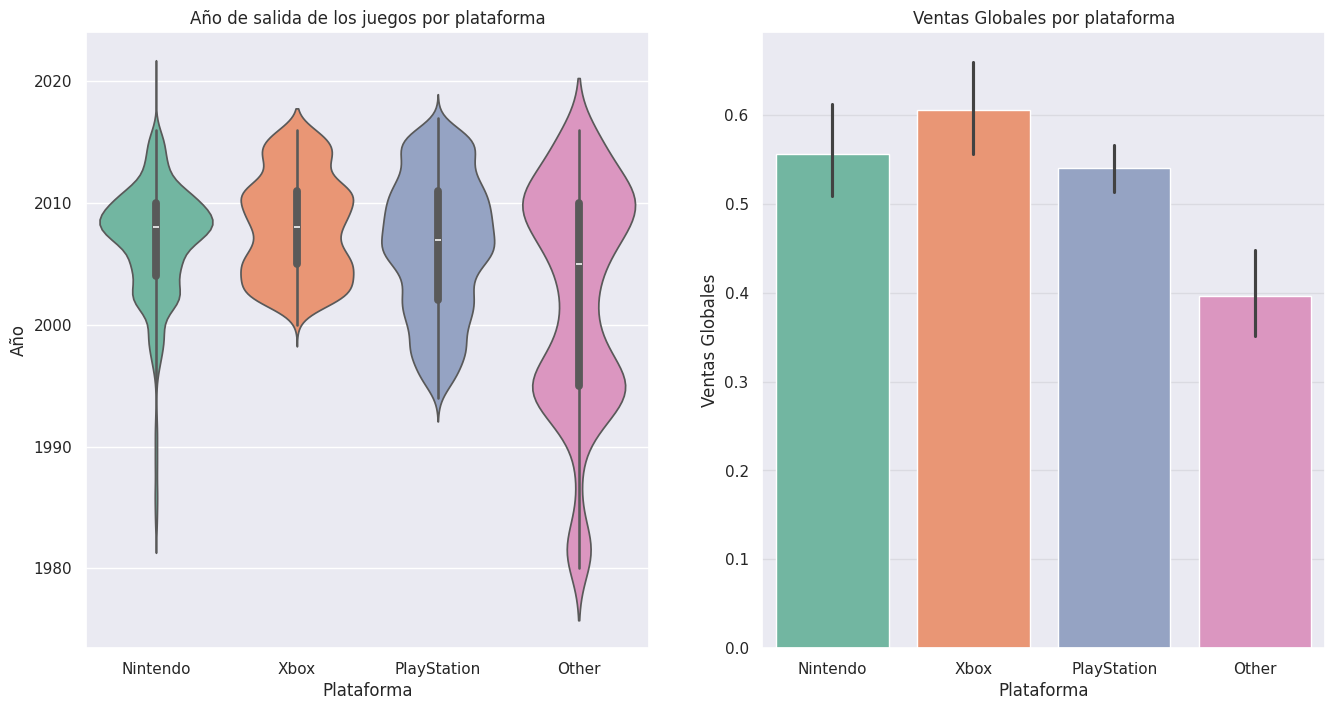

In [ ]:
# violin charts complementar con caja y poner titutlos de graficas
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8))
sns.violinplot(data_juegos, x = 'group_platform', y = 'Year',hue = 'group_platform', palette = 'Set2', ax=axes[0])
axes[0].set_title('Año de salida de los juegos por plataforma')
axes[0].set_xlabel('Plataforma')
axes[0].set_ylabel('Año')
sns.barplot(data_juegos, x = 'group_platform', y = 'Global_Sales',hue = 'group_platform', palette = 'Set2', ax=axes[1])

axes[1].set_title('Ventas Globales por plataforma')
axes[1].set_xlabel('Plataforma')
axes[1].set_ylabel('Ventas Globales')

plt.show()

#Ventas y tiempo en el mercado
Los gráficos de violín son útiles para comprender la distribución de los datos. Por ejemplo, Nintendo parece tener una gran cantidad de títulos en la tabla cerca de la década de 2010 con largas colas que abarcan el período 1980-2020. Por otro lado, Xbox parece tener colas muy cortas y se concentra entre 2020 y 2000. Esto tiene sentido ya que Nintendo lleva más tiempo en la industria del juego que Xbox. La Nintendo Wii también fue extremadamente popular, donde 3 de los 5 títulos mejor clasificados obtuvieron el mayor número de ventas. Wii Sports es único en el sentido de que se incluyó de forma gratuita con cada compra de la consola, lo que podría ser una de las razones por las que tiene casi el doble de ventas que el siguiente título más popular, 'Super Mario Bros.'.

Otras plataformas abarcan el período más largo desde antes de 1980 hasta la década de 2020. Esto tiene sentido ya que 'The Odyssey', considerada la primera consola desarrollada, se lanzó en los EE. UU. allá por 1972. También hay otras consolas anteriores a la de Nintendo, y los juegos de PC todavía se disfrutan hasta el día de hoy.

A continuación, veamos las cifras de ventas. Para este análisis, las ventas generalmente se referirán a 'Ventas Globales', aunque también se considerarán las otras cifras para determinar las preferencias por región. Nuevamente, las unidades de ventas están en millones.

Curiosamente, la plataforma 'Xbox' tiene el promedio de ventas global más alto, seguida de cerca por Nintendo y Playstation. Este resultado es interesante ya que Nintendo tiene muchos títulos en el top 5 del ranking del conjunto de datos. Sin embargo, una hipótesis para la cifra más baja de 'Global_Sales' es que Nintendo (y en menor medida, Playstation) está 'penalizada' por ingresar al mercado antes que Xbox, cuando era menos probable que la gente tuviera una consola doméstica. Esto se corrobora con las colas más largas que se ven en la tabla de violín de arriba, con la categoría 'Otros', que tiene una cola más larga incluso que la de Nintendo.

Sin embargo, es interesante que Playstation parece verse afectada por su cola a pesar de que no es mucho más larga que la de Xbox, lo que sugiere que podría haber otra variable que esté afectando el promedio de 'Global_Sales'.

referencias:

https://kotaku.com/nintendos-first-arcade-games-were-well-pretty-sucky-5794203

https://web.archive.org/web/20130425021304/http://www.gamespot.com/news/77-million-xbox-360s-sold-6407243



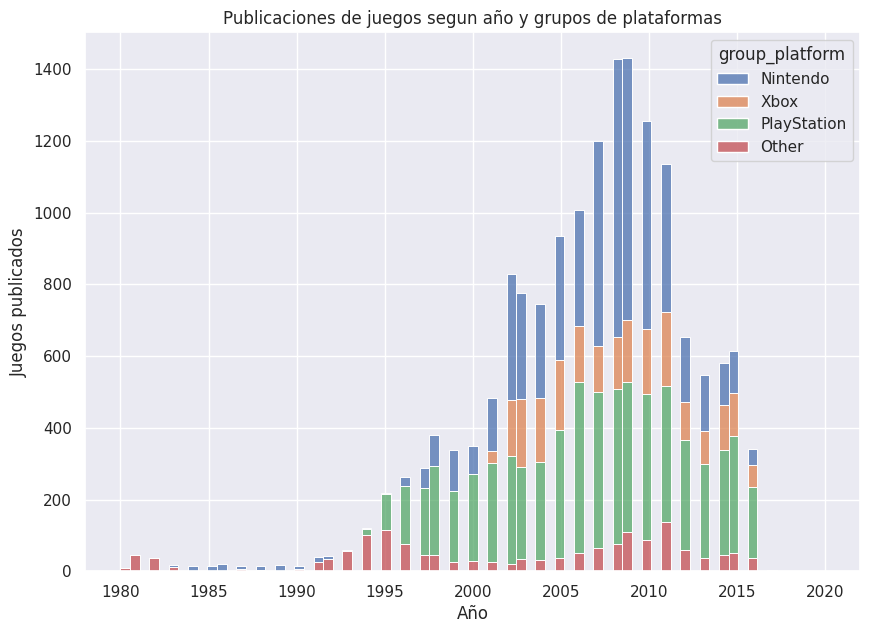

In [ ]:
plt.figure(figsize=[10,7])
sns.histplot(data=data_juegos, x="Year", hue="group_platform", multiple="stack",stat='count')
plt.title('Publicaciones de juegos segun año y grupos de plataformas')
plt.xlabel('Año')
plt.ylabel('Juegos publicados')
plt.show()

#Primeras Apariciones
Aqui hay una apreciacion mas clara sobre las colas y el tiempo que llevan Nintendo, Playstation y Xbox. La primera aparicion que se puede ver es la de 'Other' que bien puede estar estrechamente relacionada con la plataforma de computadores (PC), 2600 (Atari 2600) donde esta tiene juegos bien posicionados como lo seria Pac-Man o Asteroids; Adelante se aprecia la llegada de Nintendo y su desarrollo (principalmente en Japon) donde comenzaria a tener participacion con lanzamientos en 1983 con: Donkey Kong Jr, Mario Bros, Mahjong, Donkey Kong, popeye y Baseball, siendo de entre estos los más vendidos Mario Bros y Mahjong. Transcurridos 11 años de estos PlayStation hace su entrada en 1994 con su 'PS' considerada tanto por volumen de ventas como por populsaridad como una de las más exitosas de la historia, y sin duda la más exitosa de la quinta generación con algunos titulos famosos como Doom o Battle Arena Toshinden. No es hasta el año 2001 que Xbox hace su aparicion con su consola 'XB' (Xbox) con uno de sus lanzamientos más famosos con el Halo: Combat Evolved que fue el titulo que abrio paso a la popularidad de Xbox.

- https://es.ign.com/xbox/203491/lists/todas-las-consolas-xbox-historia-completa-con-fechas-de-lanzamiento#:~:text=Xbox%20%2D%20noviembre%2015%2C%202001,la%20conocemos%20hoy%20en%20d%C3%ADa.

- https://hardzone.es/reportajes/listas/todas-consolas-playstation/

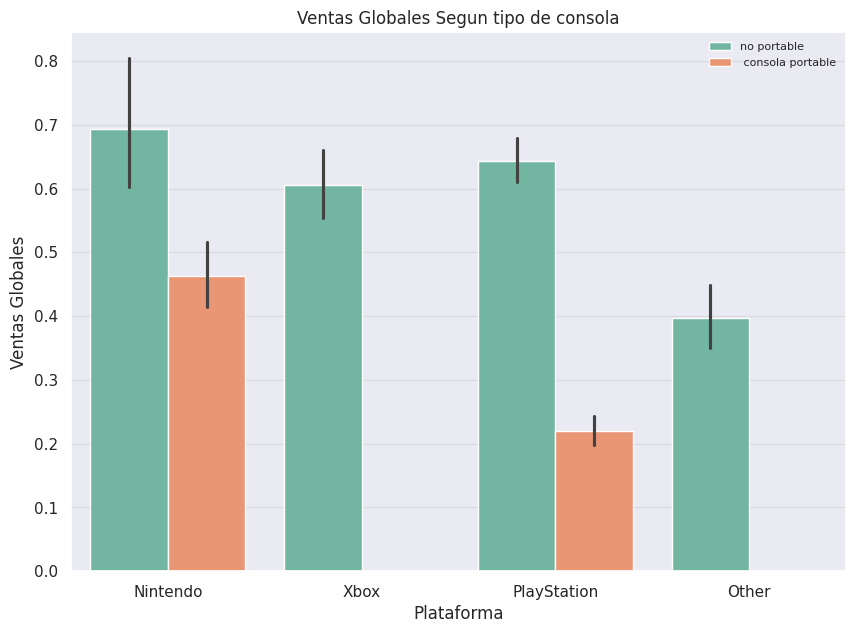

In [ ]:
# barplot with additional hue
plt.figure(figsize=[10,7])
sns.barplot(data_juegos, x = 'group_platform', y = 'Global_Sales', hue = 'handheld', palette = 'Set2')
plt.title('Ventas Globales Segun tipo de consola')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')
plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15)
plt.legend(loc=1,fontsize=8, frameon=False)
plt.show()

#Un factor que tiene la plataforma 'Playstation' es que 'Xbox' no tiene consolas de mano. ¿Cambia este gráfico al tener en cuenta si una consola es portátil o no?

La plataforma Xbox no tiene consolas portátiles, mientras que tanto Nintendo como Playstation tienen computadoras portátiles que registraron cifras de 'Global_Sales' más bajas en comparación con las ventas de sus consolas domésticas. Si nos fijamos únicamente en las consolas domésticas, tanto Nintendo como Playstation muestran cifras de 'Global_Sales' más altas en comparación con 'Xbox'.

Ademas desde los años 80, Nintendo ha sido un pilar fundamental en la evolución de los videojuegos. Con el lanzamiento del Nintendo Entertainment System (NES) en 1983, la compañía estableció un nuevo estándar para las consolas domésticas, popularizando títulos icónicos como "Super Mario Bros." y "The Legend of Zelda". La innovación continuó con el Super Nintendo Entertainment System (SNES) en 1990, que ofrecía gráficos avanzados y una rica biblioteca de juegos. La introducción de la Nintendo 64 en 1996 llevó los gráficos 3D a la vanguardia, con títulos revolucionarios como "Super Mario 64". Posteriormente, la GameCube en 2001 y la Wii en 2006 destacaron por su capacidad para redefinir la experiencia de juego, siendo la Wii particularmente exitosa gracias a su innovador control de movimiento. Las consolas portátiles, como la Game Boy, la Nintendo DS y la Nintendo 3DS, también jugaron un papel crucial en el dominio de Nintendo, ofreciendo experiencias de juego portátiles inigualables.

referencia: https://www.nintendo.com/en-gb/Hardware/Nintendo-History/Nintendo-History-625945.html


Otra métrica interesante para ver serían las ventas regionales por plataforma para ver si una plataforma agrupada tiene mayor influencia en una región que las demás.

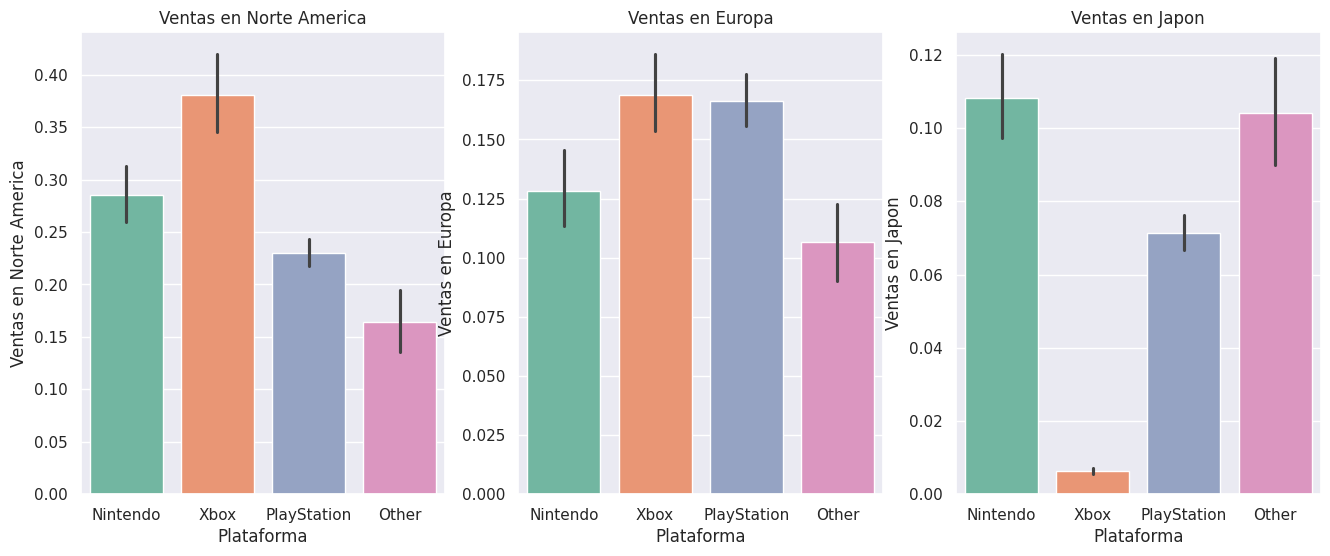

In [ ]:
# set 3 plots
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6)) # figsize = () option allows you to set size of subplot in inches

# sales by grouped_platform

sns.barplot(data_juegos, x = 'group_platform', y = 'NA_Sales',hue = 'group_platform', palette = 'Set2', ax = axes[0])
axes[0].set_title('Ventas en Norte America')
axes[0].set_xlabel('Plataforma')
axes[0].set_ylabel('Ventas en Norte America')
sns.barplot(data_juegos, x = 'group_platform', y = 'EU_Sales',hue = 'group_platform', palette = 'Set2', ax = axes[1])
axes[1].set_title('Ventas en Europa')
axes[1].set_xlabel('Plataforma')
axes[1].set_ylabel('Ventas en Europa')
sns.barplot(data_juegos, x = 'group_platform', y = 'JP_Sales',hue = 'group_platform', palette = 'Set2', ax = axes[2])
axes[2].set_title('Ventas en Japon')
axes[2].set_xlabel('Plataforma')
axes[2].set_ylabel('Ventas en Japon')
plt.show()

#Popularidad segun la Region

Xbox destaca como una plataforma muy popular en Occidente, donde lidera las ventas medias tanto en Norteamérica como en la UE. Sin embargo, tienen muy poca presencia en Japón, donde las ventas de títulos de Xbox son aproximadamente entre 4 y 5 veces menores en comparación con Nintendo, otras consolas y Playstation.

Desde 1980 hasta 2016, las ventas de Nintendo, Xbox y PlayStation variaron significativamente en las regiones de Europa, Norteamérica y Japón, reflejando las preferencias de los consumidores y las estrategias de mercado de cada compañía. Nintendo, con sus raíces profundamente arraigadas en Japón, dominó su mercado local desde el lanzamiento del Famicom (NES) en 1983, y continuó con el éxito del Super Famicom (SNES), Nintendo 64 y GameCube. En Norteamérica y Europa, el NES y SNES también lograron un éxito masivo, cimentando la presencia global de Nintendo. Sin embargo, la Wii, lanzada en 2006, fue un fenómeno global sin precedentes, superando las ventas de sus competidores en todas las regiones gracias a su innovador control de movimiento y su atractivo para una audiencia amplia y diversa.

PlayStation, también disfrutó de un éxito global impresionante desde el lanzamiento de la PlayStation original en 1994. La PlayStation 2, lanzada en 2000, se convirtió en la consola más vendida de todos los tiempos, con una fuerte presencia en Europa, Norteamérica y Japón. La PlayStation 3 y la PlayStation 4 continuaron esta tendencia, especialmente en Europa y Norteamérica, donde las robustas bibliotecas de juegos exclusivos y el potente hardware fueron altamente valorados. Microsoft, aunque un participante más reciente en la industria con el lanzamiento de la Xbox en 2001, logró establecer una fuerte base en Norteamérica, donde la Xbox 360 se destacó notablemente. Sin embargo, la Xbox enfrentó desafíos en Japón, donde nunca logró el mismo nivel de penetración de mercado que Nintendo y PlayStation. En Europa, la Xbox 360 también encontró éxito, aunque la competencia con PlayStation fue más intensa.


 Como tal, podría ser un ejercicio interesante descubrir por qué Xbox tiene ventas tan bajas en Japón.

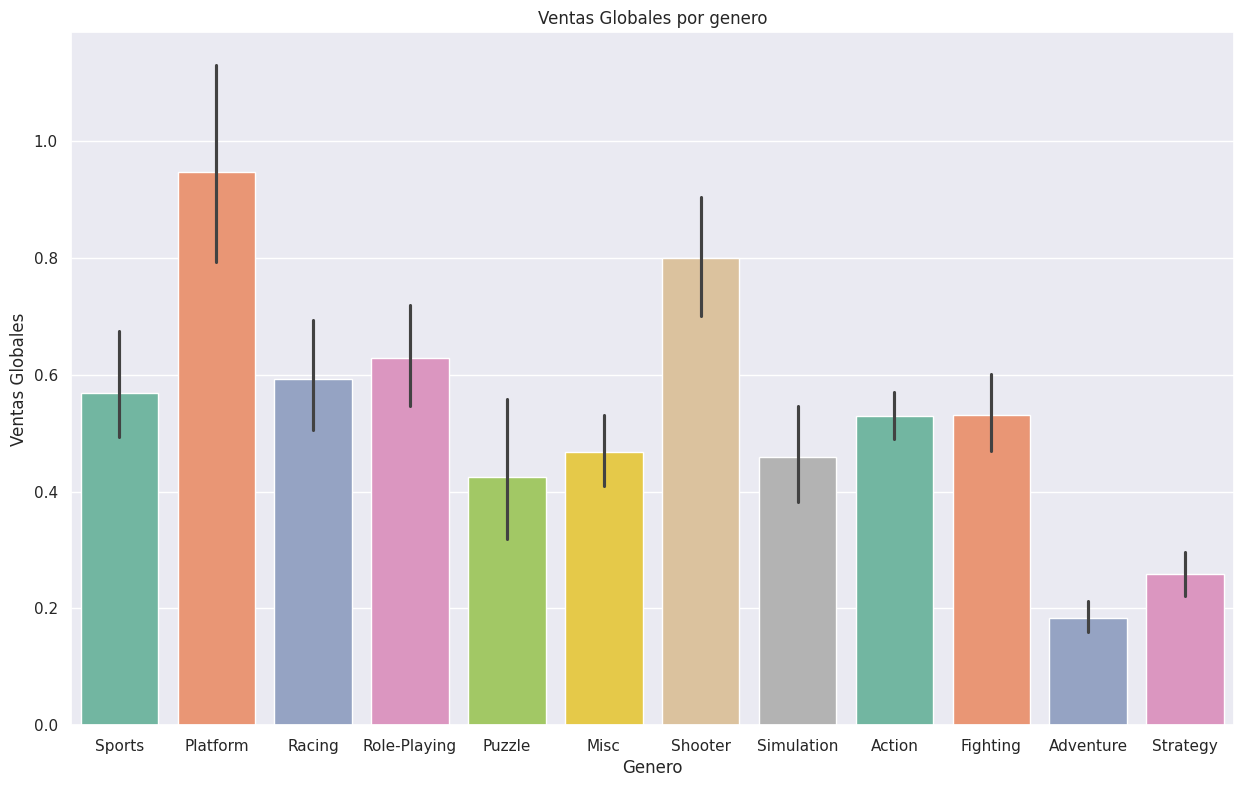

In [ ]:
fig_size = (15, 9)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = fig_size)

# seaborn does not have an explicit size editor
sns.barplot(data_juegos, x = 'Genre', y = 'Global_Sales',hue = 'Genre', palette = 'Set2')
plt.title('Ventas Globales por genero')
plt.xlabel('Genero')
plt.ylabel('Ventas Globales')
plt.show()

#Principales Generos Globalmente
Observemos que hay dos líderes claros en 'Global_Sales': 'Platform' y 'Shooter'. Los intervalos de confianza para 'Plataforma' son más largos que para 'Shooter', lo que sugiere que hay una gama más amplia de valores en el género 'Platform' en comparación con los shooters.

Desde la década de 1980 hasta 2016, los géneros de videojuegos más populares han reflejado la evolución tecnológica y los cambios en las preferencias de los jugadores. Por eso los juegos de plataformas como "Super Mario Bros." (1985) y "Sonic the Hedgehog" (1991) dominaron el mercado (de ahi el valor mas alto en la grafica), ofreciendo experiencias accesibles y divertidas que capturaron la imaginación de millones. Con el avance de los gráficos y la capacidad de procesamiento, los juegos de rol (RPG) también ganaron popularidad, especialmente en Japón, con títulos como "Final Fantasy" (1987) y "Dragon Quest" (1986). Estos juegos ofrecían historias complejas y mundos expansivos que mantenían a los jugadores inmersos durante horas.

A medida que la tecnología continuó avanzando, los juegos de disparos en primera persona (FPS) y los juegos de acción y aventura comenzaron a liderar las listas de popularidad (por eso es el #2 a nivel de ventas en la graficas y seguido por los juegos de rol). "Doom" (1993) y "Half-Life" (1998) establecieron los estándares para el género FPS, mientras que "The Legend of Zelda: Ocarina of Time" (1998) y "Grand Theft Auto III" (2001) redefinieron lo que podía ser un juego de acción y aventura con sus vastos mundos abiertos y narrativas ricas. En los 2000s y hasta 2016, los juegos multijugador en línea masivos (MMO) como "World of Warcraft" (2004) y los juegos de disparos en línea como "Call of Duty" (2003) se convirtieron en fenómenos culturales, atrayendo a millones de jugadores en todo el mundo y estableciendo la base para el auge del juego competitivo y los esports.

Referencias:

- https://www.ign.com/reviews/games

- https://www.gamespot.com/games/reviews/

- https://www.nintendo.com/en-gb/Iwata-Asks/Iwata-Asks-Dragon-Quest-IX/Iwata-Asks-Dragon-Quest-IX/Click-the-thumbnails-below-to-watch-the-Iwata-Asks-video-interview-for-Dragon-Quest-IX-/Iwata-Asks-video-interview-for-Dragon-Quest-IX-214762.html

- https://www.pcgamer.com/the-history-of-the-first-person-shooter/


'Adventure' y 'Strategy' representan los dos resultados más bajos en términos de 'Global_Sales'. ¿Esto difiere según la plataforma?

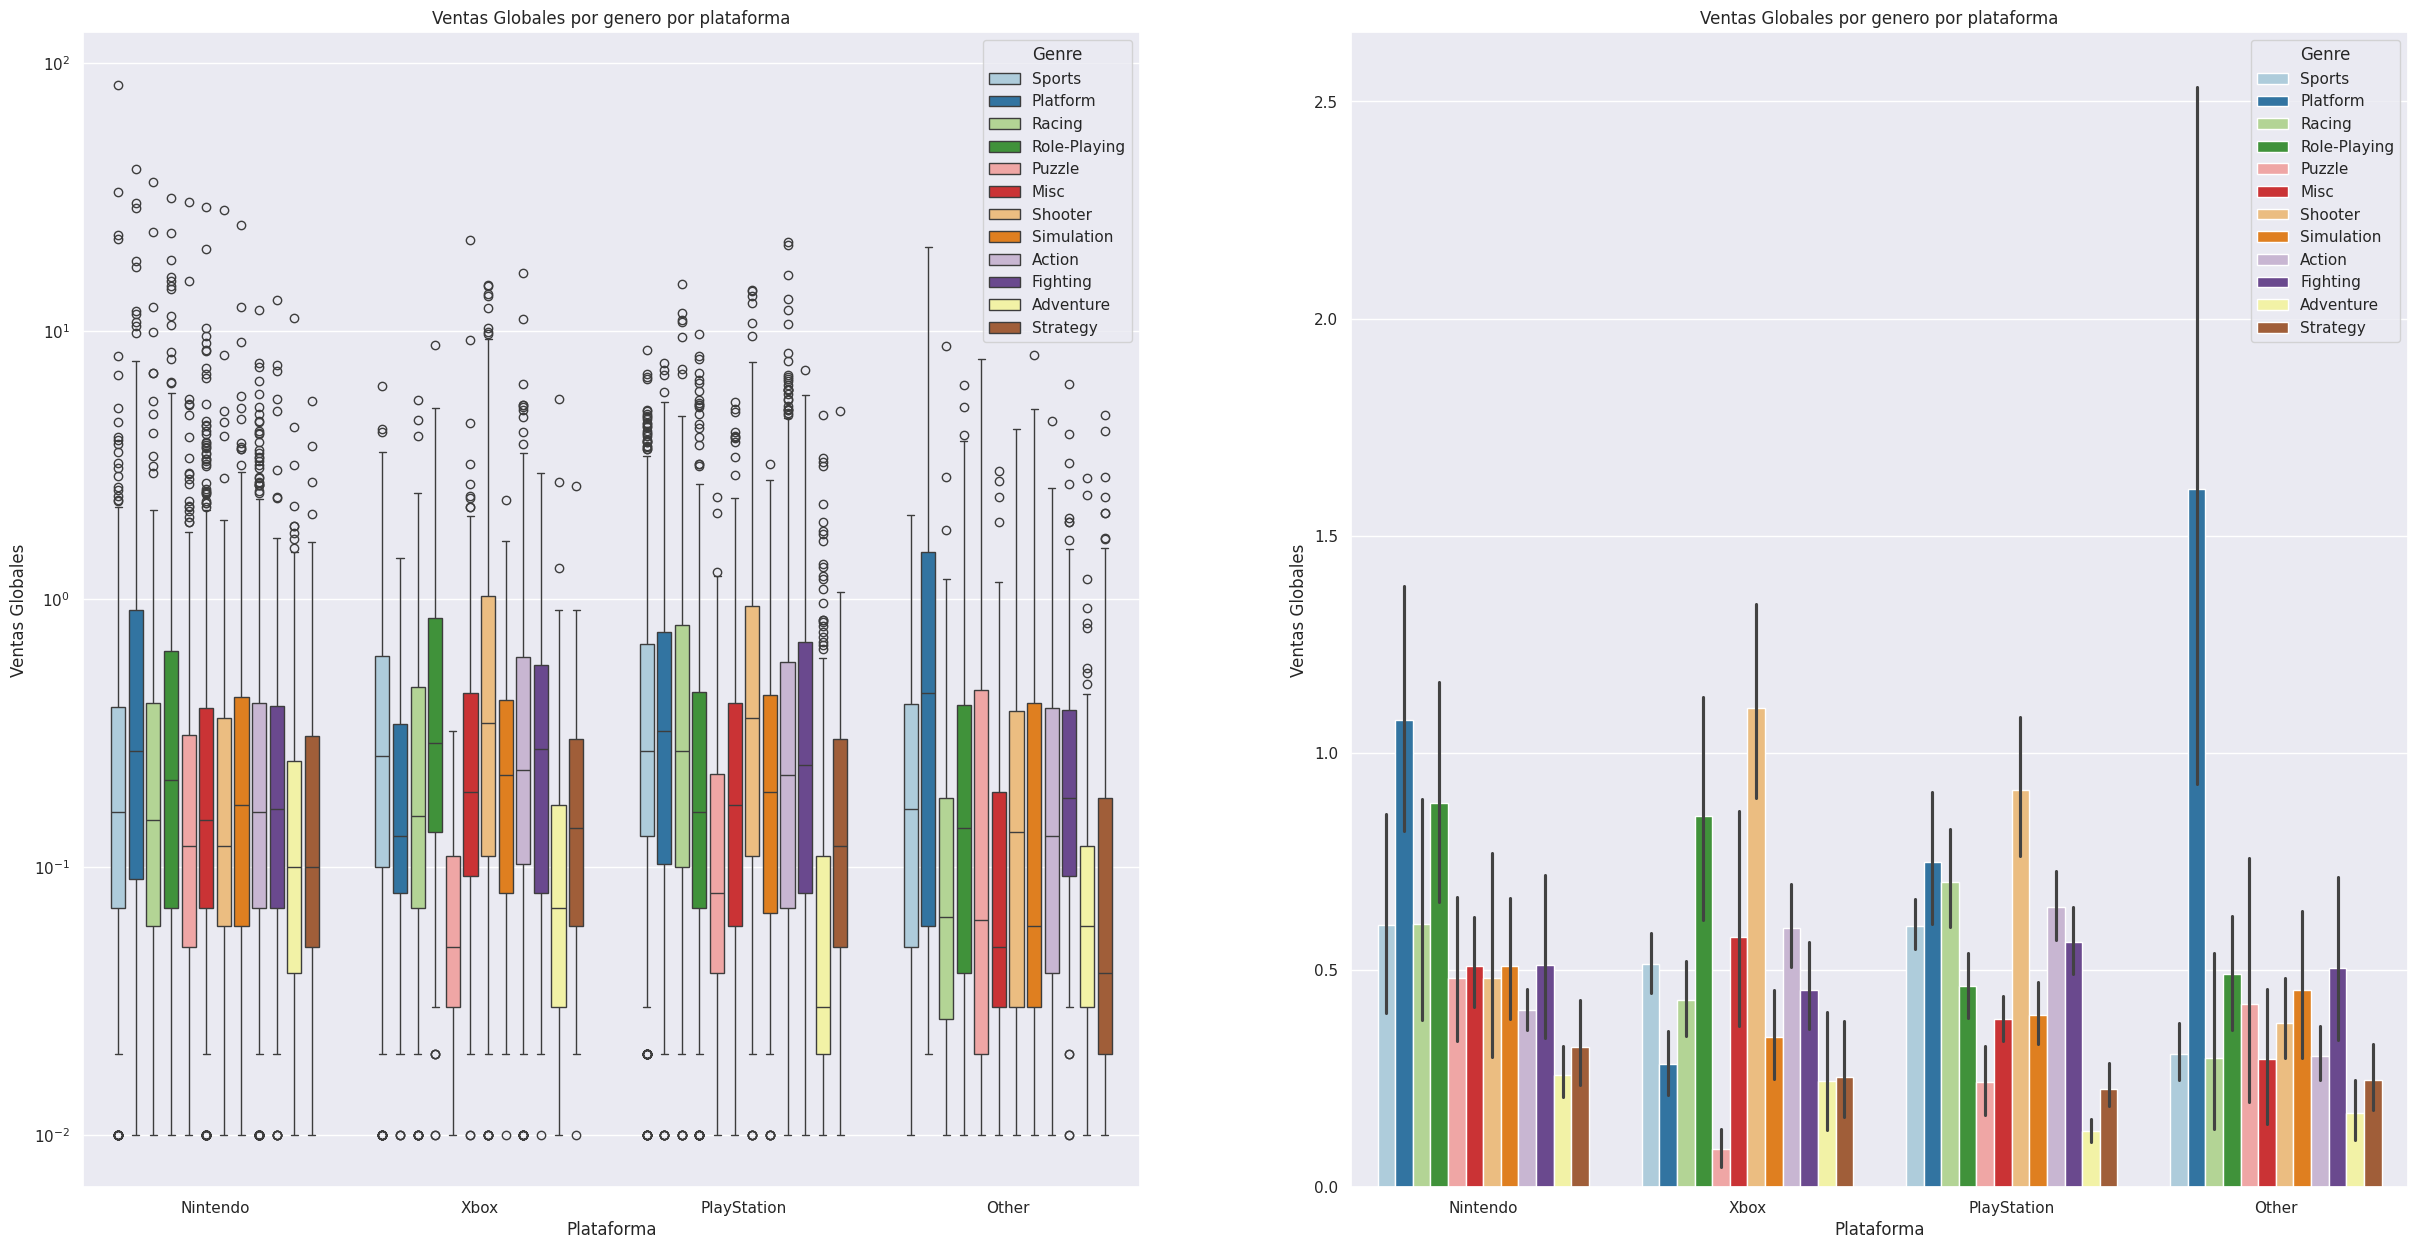

In [ ]:
fig_size = (30, 15)
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = fig_size)

# seaborn does not have an explicit size editor
sns.boxplot(data=data_juegos ,  y='Global_Sales',x='group_platform', hue='Genre',whis=1, gap=0.2, log_scale=True, palette='Paired',ax=axes[0]);
axes[0].set_title('Ventas Globales por genero por plataforma')
axes[0].set_xlabel('Plataforma')
axes[0].set_ylabel('Ventas Globales')

sns.barplot(data_juegos, x = 'group_platform', y = 'Global_Sales',hue = 'Genre', palette = 'Paired',ax=axes[1])
axes[1].set_title('Ventas Globales por genero por plataforma')
axes[1].set_xlabel('Plataforma')
axes[1].set_ylabel('Ventas Globales')
plt.show()

#Analisis de generos segun plataforma

Nintendo posee un claro distintivo con sus juegos de plataforma y Role-play a diferencia de otros generos. La explicacion mas sencilla es que Nintendo tiene una clara tendencia al desarrollo de videojuegos centrados en plataformas y role-play gracias a sus titulos con mayor volumen de ventas, Super Mario Bros siendo un juego de plataformas  y Pokemon red/Pokemon blue que cae en la categoria de Role-play por mencionar algunos ejemplos.

Por su parte Xbox tiene una mayor tendencia en Shooters, esto tambien gracias a que sus juegos insignia son parte de este genero, por mencionar algunos serian Halo: Combat Evolved y sus posteriores entregas de la saga ademas de otros titulos como Gears of War que es un Shooter exclusivo de Xbox. A su vez por estas razones es que el genero menos vendido es el de puzzles como contraparte, esto hace que bien haya un desnivel en lo que se da a las ventas segun el género, haciendo que Xbox tenga la proporcion de ventas por genero mas inconsistente.

PlayStation tambien tiene una alta tendencia en el género de Shooters, donde uno de los Shooter mas famosos de este genero hace debut (Call of Duty: Black Ops 3).

En ultima instancia estan los generos que terminan en el grupo de 'Others' aqui hay una marcada diferencia en el genero de plataformas y seguido a este esta el genero de 'Fighting' o luchas. Estos valores se deben gracias a que la mayoria de los juegos representados son de finales de los 2000, donde el genero de plataformas era lo mas común junto con los de peleas de arcade.

- https://www.levelup.com/juegos/genre/Peleas/platform/Arcade

In [ ]:
df_bus = data_juegos[data_juegos['group_platform'] == 'PlayStation']
df_bus.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,dup_flag,group_platform,handheld
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,Grand Theft Auto VPS30 2006.0\n1 ...,PlayStation,no portable
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,Grand Theft Auto: San AndreasPS20 2006....,PlayStation,no portable
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,Grand Theft Auto: Vice CityPS20 2006.0\...,PlayStation,no portable
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98,Gran Turismo 3: A-SpecPS20 2006.0\n1 ...,PlayStation,no portable
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,Call of Duty: Black Ops 3PS40 2006.0\n1...,PlayStation,no portable


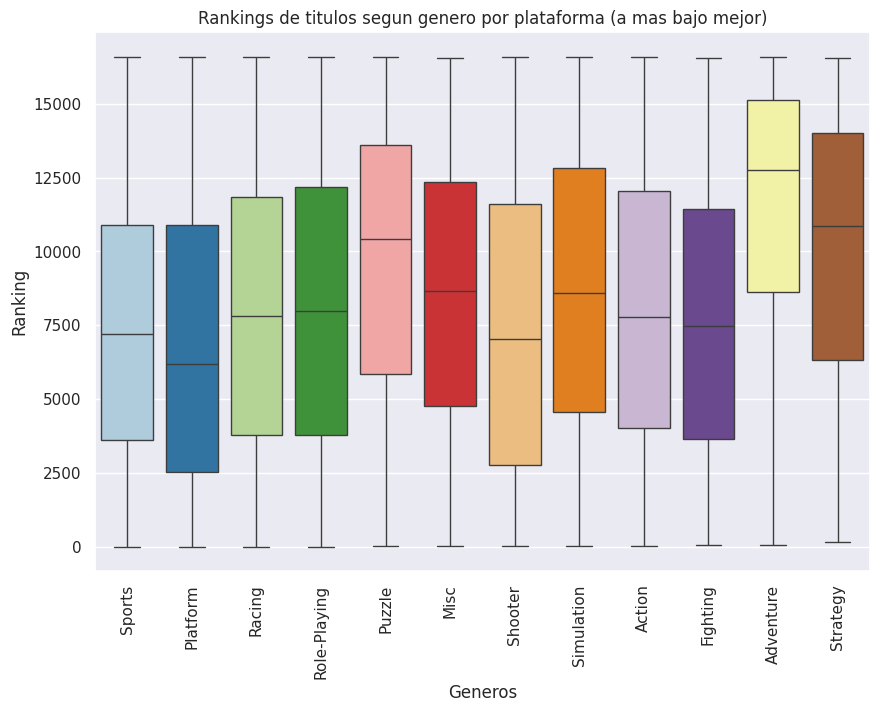

In [ ]:
plt.figure(figsize=[10,7])
sns.boxplot(data=data_juegos ,  y='Rank',x='Genre',hue='Genre', palette='Paired');
plt.title('Rankings de titulos segun genero por plataforma (a mas bajo mejor)')
plt.xlabel('Generos')
plt.ylabel('Ranking')
plt.xticks(rotation=90)
plt.show()

#Ranking por Género

Como se ve en el gráfico los juegos de plataformas alcanzaron una notable popularidad. Con el surgimiento de consolas como la Nintendo Entertainment System (NES) clásicos como "Super Mario Bros." definieron el género diseños innovadores y jugabilidad adictiva, estableciendo asi estándares para futuras entregas. Estos juegos centrados en la habilidad del jugador para navegar niveles llenos de obstáculos y enemigos, a menudo con una mezcla de precisión y velocidad hacian que en conjunto con personajes memorables y melodías pegajosas se convirtieran en parte de la cultura popular de los juegos de plataformas.

Como adicional, de 2000 a 2016, el género de plataformas experimentó una evolución significativa, adaptándose a las capacidades gráficas mejoradas y a las expectativas cambiantes de los jugadores. Títulos como "Rayman Origins" y "Super Mario Galaxy" llevaron el género a nuevas alturas con mundos tridimensionales expansivos y mecánicas de juego innovadoras. Además, el resurgimiento de juegos de plataformas independientes, como "Super Meat Boy" y "Shovel Knight", mostró un amor continuo por el estilo retro y una apreciación por el diseño desafiante. Estos juegos independientes demostraron que, a pesar de la evolución tecnológica, el corazón del género de plataformas, basado en la precisión y la diversión, seguía siendo relevante y apreciado por una nueva generación.

- McGowan, C. (2003). Game Over: How Nintendo Conquered The World. Random House.
- Totilo, S. (2011). "Rayman Origins: Platforming Perfection," Kotaku.
- Plante, C. (2015). "The best indie platformers of 2015," Polygon.

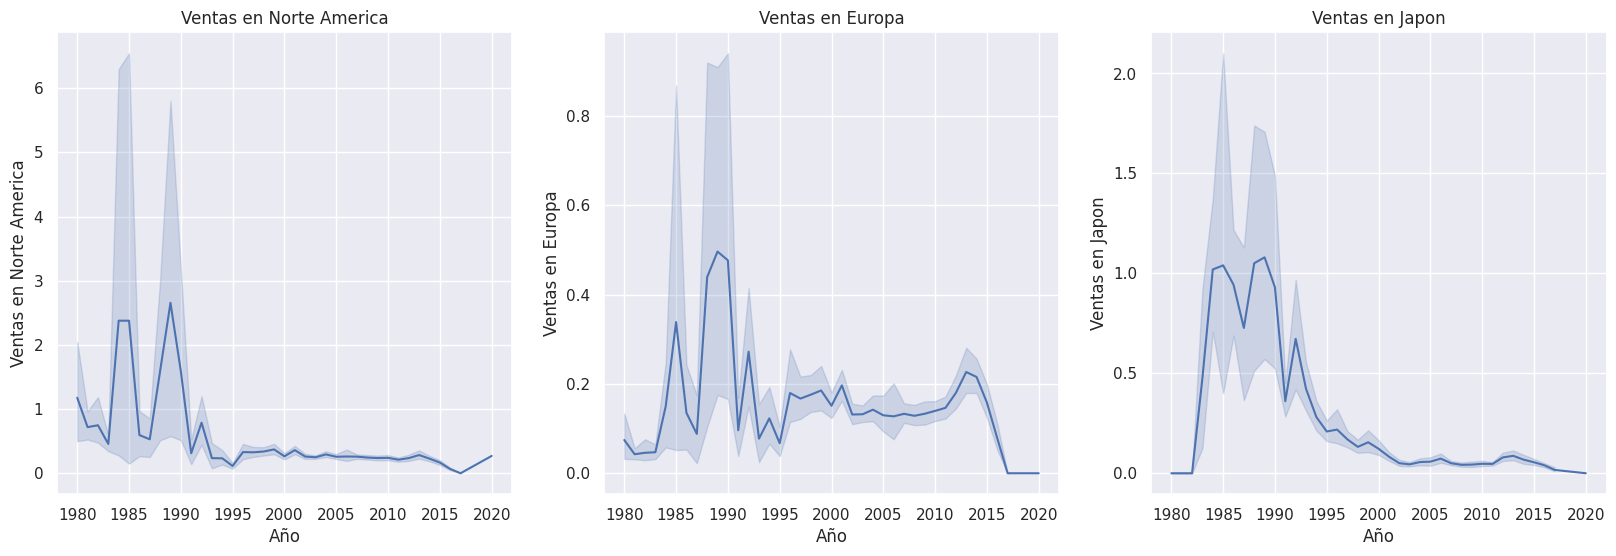

In [ ]:
# set 3 plots
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6)) # figsize = () option allows you to set size of subplot in inches

# sales by grouped_platform
sns.lineplot(data_juegos, x = 'Year', y = 'NA_Sales', ax = axes[0],markers=True)
axes[0].set_title('Ventas en Norte America')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Ventas en Norte America')
sns.lineplot(data_juegos, x = 'Year', y = 'EU_Sales', ax = axes[1])
axes[1].set_title('Ventas en Europa')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Ventas en Europa')
sns.lineplot(data_juegos, x = 'Year', y = 'JP_Sales', ax = axes[2])
axes[2].set_title('Ventas en Japon')
axes[2].set_xlabel('Año')
axes[2].set_ylabel('Ventas en Japon')
plt.show()

#sns.set(style="darkgrid")

plt.show()

#¿Qué podemos deducir de las ventas?

Entre 1970 y 2000, Norteamérica experimentó importantes cambios culturales y económicos. La década de 1970 estuvo marcada por la crisis del petróleo, que afectó la economía y llevó a la inflación y el desempleo. A pesar de estos desafíos, la década de 1980 trajo un período de crecimiento económico bajo el liderazgo de Ronald Reagan, con políticas de desregulación y reducción de impuestos que impulsaron el mercado bursátil y fomentaron una era de consumismo. Culturalmente, Norteamérica vio el auge de la música disco en los 70, el surgimiento del rock y el heavy metal en los 80, y la explosión de la cultura pop y la tecnología en los 90, con la popularización de Internet y los videojuegos, que lo que nos da un contexto sobre tiene picos tan altos de ventas en estos periodos de tiempo.

En Europa, el período de 1970 a 2000 estuvo caracterizado por la integración económica y política progresiva, especialmente con la formación de la Comunidad Económica Europea (CEE) y, posteriormente, la Unión Europea (UE). Las décadas de 1970 y 1980 estuvieron marcadas por tensiones políticas, como la Guerra Fría y conflictos regionales, pero también por el desarrollo de políticas de bienestar social y la reconstrucción económica. En los 90, la caída del Muro de Berlín y la reunificación de Alemania simbolizaron el fin de la división Este-Oeste, y la UE se expandió significativamente. Por estas mismas coyunturas en Europa es que en la linea de tiempo de ventas del intervalo 1980-2000 en Europa se presentas el nivel de ventas más bajo entre Japón y Norte América aunque en los años posteriores esta seria la que tendria el margen de ventas más estable.

Japón, por su parte, vivió un crecimiento económico espectacular conocido como el "milagro económico japonés" durante las décadas de 1970 y 1980. El país se convirtió en una potencia económica mundial, con innovaciones en tecnología y manufactura que establecieron a marcas japonesas como Sony, Toyota y Nintendo en el escenario global. Sin embargo, la burbuja económica que se había inflado durante estos años estalló a principios de los 90, lo que llevó a una década de estancamiento económico conocida como la "década perdida". Culturalmente, Japón influenció globalmente con su animación (anime), videojuegos y moda, consolidando su papel como un epicentro de tendencias juveniles y cultura pop, he ahi la caida del pico de ventas de Japón que segun el gráfico haria que se convirtiera en la region con menos volumen de ventas.





- Brenner, R. (2002). The Boom and the Bubble: The US in the World Economy. Verso.
- Judt, T. (2005). Postwar: A History of Europe Since 1945. Penguin Books.
- Pilling, D. (2014). Bending Adversity: Japan and the Art of Survival. Penguin Books.
- Hobsbawm, E. (1994). Age of Extremes: The Short Twentieth Century, 1914-1991. Michael Joseph.



In [ ]:
import plotly.express as px
fig=px.histogram(data_juegos,
                 x='Year',
                 marginal='box',
                 color_discrete_sequence=['Green'],
                 labels={
                     "Year": "Año",
                     "count": "Juegos lanzados"
                 },
                 title="Juegos por año")
fig.update_layout(bargap=0.1)
fig.show()

#La popularidad de los videojuegos

 la industria de los videojuegos experimentó un crecimiento y una transformación significativos, impulsados por avances tecnológicos y cambios en las preferencias de los consumidores. El inicio de la década estuvo marcado por la popularidad de consolas de sexta generación como la PlayStation 2, la Xbox original y la Nintendo GameCube, las cuales ofrecieron gráficos mejorados y capacidades de juego más avanzadas. En particular, la PlayStation 2 de Sony que fue una de las cuales destacó como una de las consolas más vendidas de todos los tiempos, consolidando la posición de PlayStation en el mercado. Este período también vio el auge de los juegos de PC, con títulos como "The Sims" y "World of Warcraft" ganando millones de jugadores en todo el mundo.

A mediados de la década, la séptima generación de consolas cambió nuevamente el panorama con la introducción de la Xbox 360, la PlayStation 3 y la Nintendo Wii. La Xbox 360 de Microsoft y la PlayStation 3 de Sony ofrecieron gráficos de alta definición y experiencias en línea mejoradas, mientras que la Nintendo Wii introdujo una jugabilidad innovadora basada en el movimiento, lo que atrajo a un público más amplio y diversificado. Durante este período, los juegos en línea y los servicios de descarga digital, como Xbox Live y PlayStation Network, comenzaron a ganar tracción, cambiando la forma en que los jugadores adquirían y experimentaban los videojuegos, por eso conforme se dan saltos entre los años 2000, 2005 y 2010 el conteo de juegos por año produce un aumento significativo.

- Kent, S. L. (2001). The Ultimate History of Video Games: From Pong to Pokemon--The Story Behind the Craze That Touched Our Lives and Changed the World. Prima Publishing.

In [ ]:
fig_size = (10, 9)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = fig_size)

# seaborn does not have an explicit size editor
df_filtrado = data_juegos[data_juegos['NA_Sales'] <= 15]
sns.histplot(df_filtrado, x = 'Year', y = 'NA_Sales',element='poly')
plt.title('Ventas Globales por genero')
plt.xlabel('Genero')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=90)
plt.show()

#Bibliografia

https://www.fib.upc.edu/retro-informatica/historia/videojocs.html

https://www.vgchartz.com/